<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 5: Edge and Corner Detection

## Preliminaries

Run the cell below to download the class pack.

In [1]:
import gdown

gdown.download(id='1I2ZIDSC4AL5PzO9RkiyW_Bw-Fhhg-gwZ')

!unzip -o '05.zip'
!rm '05.zip'

Downloading...
From: https://drive.google.com/uc?id=1I2ZIDSC4AL5PzO9RkiyW_Bw-Fhhg-gwZ
To: /content/05.zip
100%|██████████| 4.09M/4.09M [00:00<00:00, 187MB/s]

Archive:  05.zip
  inflating: atletica-0.png          
  inflating: atletica-8.png          
  inflating: atletica-16.png         
  inflating: atletica-32.png         
  inflating: consulting-0.png        
  inflating: consulting-8.png        
  inflating: consulting-16.png       
  inflating: consulting-32.png       
  inflating: harvard-0.png           
  inflating: harvard-8.png           
  inflating: harvard-16.png          
  inflating: harvard-32.png          
  inflating: informatica-0.png       
  inflating: informatica-8.png       
  inflating: informatica-16.png      
  inflating: informatica-32.png      
  inflating: insper-0.png            
  inflating: insper-8.png            
  inflating: insper-16.png           
  inflating: insper-32.png           
  inflating: sdx.py                  
  inflating: smash-0.png             
  inflating: smash-8.png             
  inflating: smash-16.png            
  inflating: smash-32.png            


Run the cell below to import the class modules.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [89]:
import cv2 as cv
import scipy
import numpy as np

from sdx import *

## Loading a specific image

The idea of this notebook is, once again, running the same code for different images.

By changing the two parameters below, you have 6x4=24 images to choose.

Possible values of `NAME`: `atletica`, `consulting`, `smash`, `insper`, `harvard`, `informatica`

In [90]:
NAME = 'consulting'

Possible values of `LEVEL`: `0`, `8`, `16`, `32`

In [91]:
LEVEL = 0

The cell below loads the chosen image, converts it to gray, and converts it to `float`.

Play a bit with the two parameters to see the differences between the images.

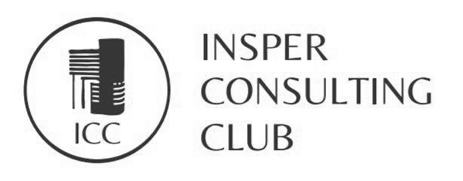

In [92]:
image = cv_grayread(f'{NAME}-{LEVEL}.png')

cv_imshow(image)

## Convolution template

As seen in the previous class, we will define a kernel of weights to perform a convolution.

In [93]:
# kernel = np.array([
#   [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
#   [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
#   [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
#   [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
#   [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]
# ])

kernel = np.array([
  [1, 1 ,  1],
  [1, -8,  1],
  [1, 1 ,  1],
])

To simplify the convolution itself, we call `scipy.signal.convolve2d`.

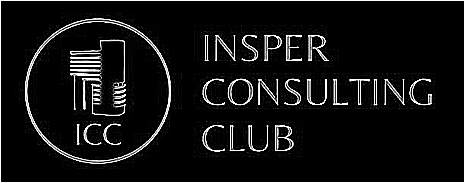

In [94]:
new_image = scipy.signal.convolve2d(image, kernel)

cv_imshow(new_image)

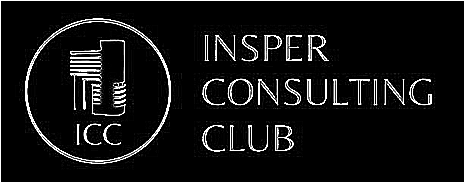

In [95]:
edges = new_image.copy()

edges[edges < 5*edges.mean()] = 0

edges[edges >= 5*edges.mean()] = 255

cv_imshow(edges)

### Detection template

In [96]:
def detect(image):
    uint8_image = image.astype(np.uint8)

    output = cv.cvtColor(uint8_image, cv.COLOR_GRAY2BGR)

    harris = cv.cornerHarris(uint8_image,5,3,0.02)

    output = cv.cvtColor(uint8_image, cv.COLOR_GRAY2BGR)

    output[harris > 3 *  harris.mean()] = [0,0,255]

    return output

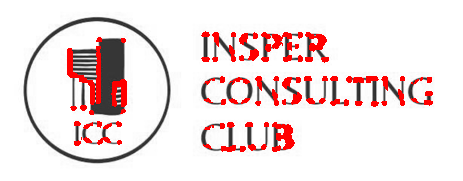

In [97]:
cv_imshow(detect(image))

You can click on the toc.png tab to the left to browse by section.